In [1]:
%pylab inline
# Pandas is a nice utilitiy that enables some easy data manipulation, especially from a csv
import pandas as pd
# Numpy lets us work with arrays
import numpy as np
# Sklearn provides various modules with a common API
from sklearn import svm, tree, neighbors, neural_network
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Read in our csv files downloaded from Kaggle
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
# We can use .head() to get just the first few rows of the data.
train_data.head()
# Note how the notebook nicely displays the output for us

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_data.columns[train_data.isna().any()].tolist()

['Age', 'Cabin', 'Embarked']

In [6]:
train_data ["SibSp"] = train_data["SibSp"] + train_data["Parch"]
test_data["SibSp"] = test_data["SibSp"] + test_data["Parch"]
train_data ["Child"] = np.where((train_data["Age"] < 14), 1, 0)
test_data ["Child"] = np.where((test_data["Age"] < 14), 1, 0)
#train_data ["Elderly"] = np.where((train_data["Age"] >55 ), 1, 0)
#test_data ["Elderly"] = np.where((test_data["Age"] >55 ), 1, 0)
#train_data ["Baby"] = np.where((train_data["Age"] <5 ), 1, 0)
#test_data ["Baby"] = np.where((test_data["Age"] <5 ), 1, 0)


train_data.drop(columns=['Name', 'Ticket', 'Cabin',  'Fare', 'Embarked', "Parch"], inplace=True)
train_data.set_index(keys=['PassengerId'], drop=True, inplace=True)

test_data.drop(columns=['Name', 'Ticket', 'Cabin', 'Fare', 'Embarked', "Parch"], inplace=True)
test_data.set_index(keys=['PassengerId'], drop=True, inplace=True)
#'Fare': train_data['Fare'].mean(),
#,  'Embarked': train_data['Embarked'].mode()[0]
train_nan_map = {'Age': train_data['Age'].mean()}
test_nan_map = {'Age': test_data['Age'].mean()}

train_data.fillna(value=train_nan_map, inplace=True)
test_data.fillna(value=test_nan_map, inplace=True)
#'Embarked': {'C': 1, 'Q': 2, 'S': 3},
columns_map = { 'Pclass' : {1:5, 3:0},'Sex': {'male': 0, 'female': 1}}
train_data.replace(columns_map, inplace=True)
test_data.replace(columns_map, inplace=True)


train_data ["MaleClassOne"] = np.where(((train_data["Pclass"] == 0) & (train_data["Sex"] == 0)), 1, 0)
test_data ["MaleClassOne"] = np.where(((test_data["Pclass"] == 0) & (test_data["Sex"] == 0)), 1, 0)

train_data ["MaleClassTwo"] = np.where(((train_data["Pclass"] == 1) & (train_data["Sex"] == 0)), 1, 0)
test_data ["MaleClassTwo"] = np.where(((test_data["Pclass"] == 1) & (test_data["Sex"] == 0)), 1, 0)

train_data ["MaleClassThree"] = np.where(((train_data["Pclass"] == 2) & (train_data["Sex"] == 0)), 1, 0)
test_data ["MaleClassThree"] = np.where(((test_data["Pclass"] == 2) & (test_data["Sex"] == 0)), 1, 0)

train_data ["FemaleClassOne"] = np.where(((train_data["Pclass"] == 0) & (train_data["Sex"] == 1)), 1, 0)
test_data ["FemaleClassOne"] = np.where(((test_data["Pclass"] == 0) & (test_data["Sex"] == 1)), 1, 0)

train_data ["FemaleClassTwo"] = np.where(((train_data["Pclass"] == 1) & (train_data["Sex"] == 1)), 1, 0)
test_data ["FemaleClassTwo"] = np.where(((test_data["Pclass"] == 1) & (test_data["Sex"] == 1)), 1, 0)

train_data ["FemaleClassThree"] = np.where(((train_data["Pclass"] == 2) & (train_data["Sex"] == 1)), 1, 0)
test_data ["FemaleClassThree"] = np.where(((test_data["Pclass"] == 2) & (test_data["Sex"] == 1)), 1, 0)

X_train = train_data.loc[:, train_data.columns != 'Survived']
y_train = train_data.loc[:, 'Survived']

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=10)

print(X_train.head())
print(y_train.head())
print(test_data.head())

             Pclass  Sex   Age  SibSp  Child  MaleClassOne  MaleClassTwo  \
PassengerId                                                                
8                 0    0   2.0      4      1             1             0   
766               5    1  51.0      1      0             0             0   
340               5    0  45.0      0      0             0             0   
375               0    1   3.0      4      1             0             0   
184               2    0   1.0      3      1             0             0   

             MaleClassThree  FemaleClassOne  FemaleClassTwo  FemaleClassThree  
PassengerId                                                                    
8                         0               0               0                 0  
766                       0               0               0                 0  
340                       0               0               0                 0  
375                       0               1               0        

In [7]:
train_data.columns[train_data.isna().any()].tolist()
#train_data[train_data['Embarked'].isna() == True]
#train_data['Embarked']
#test_data.columns[test_data.isna().any()].tolist()
xlist = []
ylist = []

In [8]:
gnb = GaussianNB()
gnb.fit(X_train.values, y_train.values)
print(gnb.score(X_test.values, y_test.values))
y_pred = gnb.predict(X_test.values)
y_truth = y_test.values
tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
xlist.append(fp/(fp + tp))
ylist.append(fn/(fn + tn))
print(xlist)
print(ylist)

0.7947761194029851
[0.3069306930693069]
[0.1437125748502994]


In [9]:
tree_clf = tree.DecisionTreeClassifier()
tree_clf.fit(X_train.values, y_train.values)
print(tree_clf.score(X_test.values, y_test.values))

y_pred = tree_clf.predict(X_test.values)
y_truth = y_test.values
tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
#xlist.append(fp/(fp + tp))
#ylist.append(fn/(fn + tn))
print(xlist)
print(ylist)

0.8283582089552238
[0.3069306930693069]
[0.1437125748502994]


In [10]:
knn_clf = neighbors.KNeighborsClassifier()
knn_clf.fit(X_train.values, y_train.values)
print(knn_clf.score(X_test.values, y_test.values))
y_pred = knn_clf.predict(X_test.values)
y_truth = y_test.values
tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
xlist.append(fp/(fp + tp))
ylist.append(fn/(fn + tn))
print(xlist)
print(ylist)

0.7649253731343284
[0.3069306930693069, 0.3402061855670103]
[0.1437125748502994, 0.17543859649122806]


In [11]:
NN_clf = neural_network.MLPClassifier()
NN_clf.fit(X_train.values, y_train.values)
print(NN_clf.score(X_test.values, y_test.values))
y_pred = NN_clf.predict(X_test.values)
y_truth = y_test.values
tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
xlist.append(fp/(fp + tp))
ylist.append(fn/(fn + tn))
print(xlist)
print(ylist)

0.832089552238806
[0.3069306930693069, 0.3402061855670103, 0.23076923076923078]
[0.1437125748502994, 0.17543859649122806, 0.13559322033898305]


/Users/brandonsu/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [12]:
RF_clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF_clf.fit(X_train.values, y_train.values)
print(RF_clf.score(X_test.values, y_test.values))
y_pred = RF_clf.predict(X_test.values)
y_truth = y_test.values
tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
#xlist.append(fp/(fp + tp))
#ylist.append(fn/(fn + tn))
print(xlist)
print(ylist)

0.8097014925373134
[0.3069306930693069, 0.3402061855670103, 0.23076923076923078]
[0.1437125748502994, 0.17543859649122806, 0.13559322033898305]


In [13]:
# LR_clf = LinearRegression()
# LR_clf.fit(X_train.values, y_train.values)
# print(LR_clf.score(X_test.values, y_test.values))
# y_pred = LR_clf.predict(X_test.values)
# y_truth = y_test.values
# tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
# xlist.append(fp/(fp + tp))
# ylist.append(fn/(fn + tn))

In [14]:
svm_clf = svm.SVC(kernel='linear')
svm_clf.fit(X_train.values, y_train.values)
print(svm_clf.score(X_test.values, y_test.values))
y_pred = svm_clf.predict(X_test.values)
y_truth = y_test.values
tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
#xlist.append(fp/(fp + tp))
#ylist.append(fn/(fn + tn))
print(xlist)
print(ylist)

0.8134328358208955
[0.3069306930693069, 0.3402061855670103, 0.23076923076923078]
[0.1437125748502994, 0.17543859649122806, 0.13559322033898305]


In [15]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=5)
mlp_clf.fit(X_train.values, y_train.values)
print(mlp_clf.score(X_test.values, y_test.values))
y_pred = mlp_clf.predict(X_test.values)
y_truth = y_test.values
tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
xlist.append(fp/(fp + tp))
ylist.append(fn/(fn + tn))
print(xlist)
print(ylist)

0.8432835820895522
[0.3069306930693069, 0.3402061855670103, 0.23076923076923078, 0.18292682926829268]
[0.1437125748502994, 0.17543859649122806, 0.13559322033898305, 0.14516129032258066]


In [16]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=10)
sgd_clf.fit(X_train.values, y_train.values)
print(sgd_clf.score(X_test.values, y_test.values))
y_pred = sgd_clf.predict(X_test.values)
y_truth = y_test.values
tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
xlist.append(fp/(fp + tp))
ylist.append(fn/(fn + tn))
print(xlist)
print(ylist)   

0.4291044776119403
[0.3069306930693069, 0.3402061855670103, 0.23076923076923078, 0.18292682926829268, 0.6224066390041494]
[0.1437125748502994, 0.17543859649122806, 0.13559322033898305, 0.14516129032258066, 0.1111111111111111]


/Users/brandonsu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [17]:
tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
print("Confusion Matrix")
print(confusion_matrix(y_truth, y_pred, labels=[0, 1]))
print("")
print("True Negatives", tn)
print("False Positives", fp)
print("False Negatives", fn)
print("True Positives", tp)

Confusion Matrix
[[ 24 150]
 [  3  91]]

True Negatives 24
False Positives 150
False Negatives 3
True Positives 91


In [18]:
y_pred_tree = mlp_clf.predict(X_test.values)
y_truth_tree = y_test.values

Confusion matrix, without normalization
[[ 24 150]
 [  3  91]]


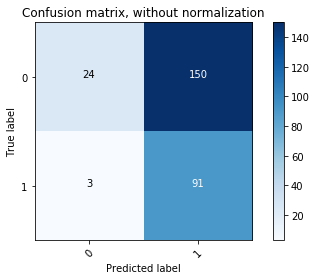

In [19]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_truth, y_pred)
class_names=['0', '1']
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()

In [20]:
predictions = knn_clf.predict(test_data.values)

In [21]:
type(predictions)

numpy.ndarray

In [22]:
pred_df = pd.DataFrame(predictions, index=test_data.index, columns=['Survived'])
type(pred_df)

pandas.core.frame.DataFrame

In [23]:
pred_df.to_csv('predictions.csv', header=True, sep=',')

In [24]:
print(xlist)
print(ylist)

[0.3069306930693069, 0.3402061855670103, 0.23076923076923078, 0.18292682926829268, 0.6224066390041494]
[0.1437125748502994, 0.17543859649122806, 0.13559322033898305, 0.14516129032258066, 0.1111111111111111]


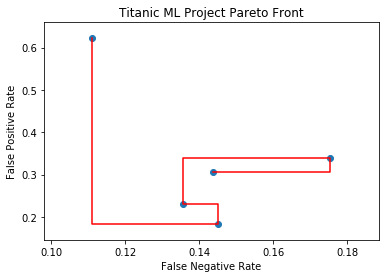

In [25]:
# index = xlist.index(min(xlist))
# xlist.remove(min(xlist))
# print(xlist)
# print(ylist)
# del ylist[index]
plt.scatter(ylist, xlist)
plt.plot(ylist, xlist, color='r', drawstyle='steps-post')
plt.xlabel("False Negative Rate")
plt.ylabel("False Positive Rate")
plt.title("Titanic ML Project Pareto Front")
plt.show()

In [26]:

import random
import operator

import numpy as np
import matplotlib.pyplot as plt

from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp

In [27]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,-1.0))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

In [28]:
random.seed(25)
df = X_train.astype('object')
pset = gp.PrimitiveSetTyped("MAIN", [type(df[col][1]) for col in df], int, "IN")
#pset = gp.PrimitiveSet("MAIN", arity=1)
pset.addPrimitive(np.add, [float,float], float)
pset.addPrimitive(np.subtract, [float,float], float)
pset.addPrimitive(np.multiply, [float,float], float)
#pset.addPrimitive(np.negative, arity=1)
#pset.addPrimitive(np.divide, [float,float], float)
pset.addPrimitive(np.logical_and, [int, int], int)
pset.addPrimitive(np.logical_or, [int, int], int)
pset.addPrimitive(np.logical_not, [int], int)
pset.renameArguments(ARG0='x')

In [29]:
toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

In [30]:
def evalSymbReg(individual, points, pset):
    func = toolbox.compile(expr=individual)
    truepositives = sum((bool(func(*data)) is True and bool(func(*data)) is bool(survived)) for data, survived in zip(X_train.values, y_train.values))
    #print ("True Pos: " + str(truepositives))
    falsepositives = sum((bool(func(*data)) is True and bool(func(*data)) is not bool(survived)) for data, survived in zip(X_train.values, y_train.values))
    #print ("False Pos: " + str(falsepositives))
    truenegatives = sum((bool(func(*data)) is not True and bool(func(*data)) is bool(survived)) for data, survived in zip(X_train.values, y_train.values))
    #print ("True Neg: " + str(truenegatives))
    falsenegatives = sum((bool(func(*data)) is not True and bool(func(*data)) is not bool(survived)) for data, survived in zip(X_train.values, y_train.values))
    #print ("False Neg: " + str(falsenegatives))
    
    #print ("\n\n")
    if truenegatives+falsenegatives == 0:
        return (0,(falsepositives/(truepositives + falsepositives)))
    if truepositives + falsepositives==0:
        return ((falsenegatives/(truenegatives + falsenegatives)),0)
    
    #(np.sqrt(np.sum(sqerrors) / len(points)),)
    return ((falsenegatives/(truenegatives + falsenegatives)),(falsepositives/(truepositives + falsepositives)))

toolbox.register("evaluate", evalSymbReg, points=np.linspace(-1, 1, 1000), pset=pset)
toolbox.register("select", tools.selBest)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))

In [31]:
def pareto_dominance(ind1, ind2):
    not_equal = False
    for value_1, value_2 in zip(ind1.fitness.values, ind2.fitness.values):
        if value_1 > value_2:
            return False
        elif value_1 < value_2:
            not_equal = True
    return not_equal

In [32]:
pop = toolbox.population(  n=300)

fitnesses = list(map(toolbox.evaluate, pop))
for ind, fit in zip(pop, fitnesses):
    ind.fitness.values = fit

a_given_individual = toolbox.population(n=1)[0]
a_given_individual.fitness.values = toolbox.evaluate(a_given_individual)

/Users/brandonsu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/brandonsu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  """
/Users/brandonsu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  import sys
/Users/brandonsu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Calling np.sum(generat

In [33]:
dominated = [ind for ind in pop if pareto_dominance(a_given_individual, ind)]
dominators = [ind for ind in pop if pareto_dominance(ind, a_given_individual)]
others = [ind for ind in pop if not ind in dominated and not ind in dominators]

In [34]:
# for ind in dominators: plt.plot(ind.fitness.values[0], ind.fitness.values[1], 'r.', alpha=0.7)
# for ind in dominated: plt.plot(ind.fitness.values[0], ind.fitness.values[1], 'g.', alpha=0.7)
# for ind in others: plt.plot(ind.fitness.values[0], ind.fitness.values[1], 'k.', alpha=0.7, ms=3)
# plt.plot(a_given_individual.fitness.values[0], a_given_individual.fitness.values[1], 'bo', ms=6);
# plt.xlabel('Mean Squared Error');plt.ylabel('Tree Size');
# plt.title('Objective space');
# plt.tight_layout()
# plt.show()

In [35]:
NGEN = 50
MU = 50
LAMBDA = 100
CXPB = 0.5
MUTPB = 0.2

pop = toolbox.population(n=MU)
hof = tools.ParetoFront()
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean, axis=0)
stats.register("std", np.std, axis=0)
stats.register("min", np.min, axis=0)
stats.register("max", np.max, axis=0)

pop, logbook = algorithms.eaMuPlusLambda(pop, toolbox, MU, LAMBDA, CXPB, MUTPB, NGEN, stats,
                          halloffame=hof)

/Users/brandonsu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/brandonsu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  """
/Users/brandonsu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  import sys
/Users/brandonsu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Calling np.sum(generat

gen	nevals	avg        	std        	min    	max        
0  	50    	[0.42 0.46]	[0.2  0.27]	[0. 0.]	[0.89 0.85]
1  	67    	[0.22 0.41]	[0.09 0.15]	[0.   0.11]	[0.36 0.6 ]
2  	69    	[0.13 0.51]	[0.06 0.07]	[0.   0.42]	[0.18 0.6 ]
3  	70    	[0.08 0.53]	[0.08 0.07]	[0.   0.46]	[0.15 0.6 ]
4  	63    	[0.  0.6]  	[0.00e+00 2.22e-16]	[0.  0.6]  	[0.  0.6]  
5  	71    	[0.  0.6]  	[0.00e+00 2.22e-16]	[0.  0.6]  	[0.  0.6]  
6  	68    	[0.  0.6]  	[0.00e+00 2.22e-16]	[0.  0.6]  	[0.  0.6]  
7  	66    	[0.  0.6]  	[0.00e+00 2.22e-16]	[0.  0.6]  	[0.  0.6]  
8  	71    	[0.  0.6]  	[0.00e+00 2.22e-16]	[0.  0.6]  	[0.  0.6]  
9  	71    	[0.  0.6]  	[0.00e+00 2.22e-16]	[0.  0.6]  	[0.  0.6]  
10 	62    	[0.  0.6]  	[0.00e+00 2.22e-16]	[0.  0.6]  	[0.  0.6]  
11 	59    	[0.  0.6]  	[0.00e+00 2.22e-16]	[0.  0.6]  	[0.  0.6]  
12 	69    	[0.  0.6]  	[0.00e+00 2.22e-16]	[0.  0.6]  	[0.  0.6]  
13 	60    	[0.  0.6]  	[0.00e+00 2.22e-16]	[0.  0.6]  	[0.  0.6]  
14 	70    	[0.  0.6]  	[0.00e+00 2.22e-16]	

Best individual is: logical_or(logical_not(IN1), logical_or(logical_and(logical_or(IN0, IN1), logical_not(IN8)), IN1))
with fitness: (0.0, 0.6019261637239165)


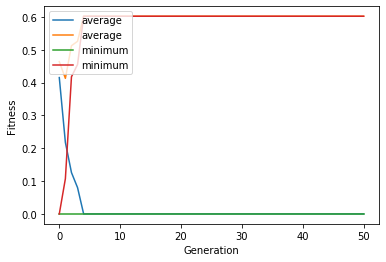

In [36]:
print("Best individual is: %s\nwith fitness: %s" % (hof[0], hof[0].fitness))
gen, avg, min_, max_ = logbook.select("gen", "avg", "min", "max")
plt.plot(gen, avg, label="average")
plt.plot(gen, min_, label="minimum")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend(loc="upper left")
plt.show()

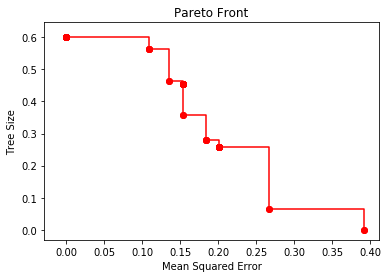

Area Under Curve: 0.12988087232811915


In [37]:
"""Split fitness values into separate lists"""
fitness_1 = [ind.fitness.values[0] for ind in hof]
fitness_2 = [ind.fitness.values[1] for ind in hof]
pop_1 = [ind.fitness.values[0] for ind in pop]
pop_2 = [ind.fitness.values[1] for ind in pop]

'''Print dominated population for debugging'''
# for ind in pop:
#     print(ind.fitness)

plt.scatter(pop_1, pop_2, color='b')
plt.scatter(fitness_1, fitness_2, color='r')
plt.plot(fitness_1, fitness_2, color='r', drawstyle='steps-post')
plt.xlabel("Mean Squared Error")
plt.ylabel("Tree Size")
plt.title("Pareto Front")
plt.show()

f1 = np.array(fitness_1)
f2 = np.array(fitness_2)

"""Calculate area under curve with least squares method"""
print("Area Under Curve: %s" % (np.sum(np.abs(np.diff(f1))*f2[:-1])))